### Melchizedek Ackah-Blay

December 11, 2024

**Car Purchase Investigation**

*load libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

import warnings as w
w.filterwarnings('ignore')

*load dataset*

In [2]:
df = pd.read_csv(r'/Users/melki/Desktop/car_data.csv')

*show sample data*

In [3]:
df.sample(4)

,User ID,Gender,Age,AnnualSalary,Purchased
993,476,Female,54,136500,0
424,880,Male,63,36500,1
520,315,Male,56,40500,1
839,589,Male,35,38000,0


*dataset shape*

In [6]:
df.shape

(1000, 5)

*data information*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


*summary statistics*

In [5]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


*null values*

In [7]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

*duplicated values*

In [8]:
df.duplicated().sum()

0

*adjusting column names*

In [9]:
df.columns = df.columns.str.lower()

*dropping unnecessary columns*

In [10]:
df.drop(columns = ['user id'], inplace = True)
df.head(4)

,gender,age,annualsalary,purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1


*gender distribution*

In [13]:
gen_dist = df['gender'].value_counts(ascending = False)
pd.DataFrame(gen_dist)

,count
gender,
Female,516
Male,484


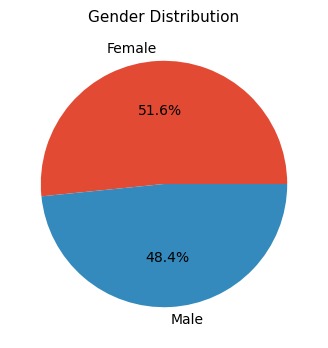

In [14]:
plt.figure(figsize = (4,4))
gen_dist.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Gender Distribution', fontsize = 11)
plt.xlabel('')
plt.ylabel('')
plt.show()

*age distribution of customers*

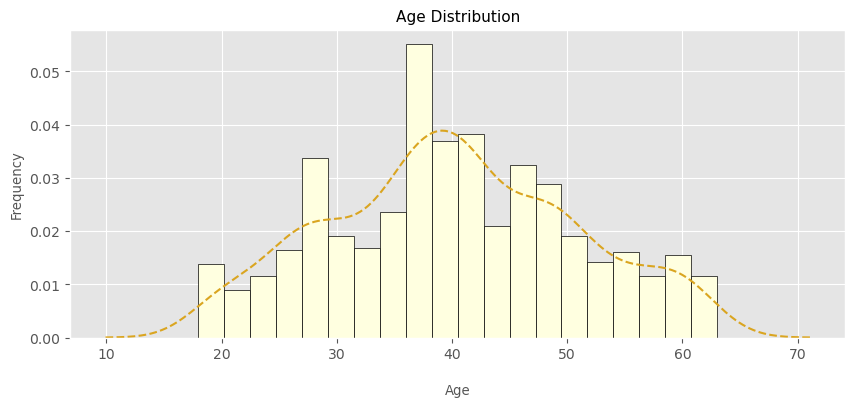

In [31]:
plt.figure(figsize = (10, 4))
plt.hist(df['age'], density = True, color = 'lightyellow', edgecolor = 'black', bins = 20)
sns.kdeplot(df['age'], color = 'goldenrod', linestyle = '--', linewidth = 1.5)
plt.title('Age Distribution', fontsize = 11)
plt.xlabel('\nAge', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*salary distribution of customers*

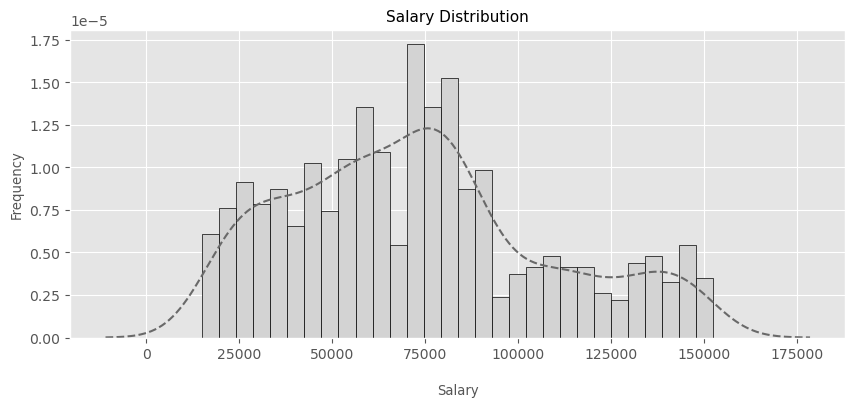

In [35]:
plt.figure(figsize = (10, 4))
plt.hist(df['annualsalary'], density = True, color = 'lightgray', edgecolor = 'black', bins = 30)
sns.kdeplot(df['annualsalary'], color = 'dimgray', linestyle = '--', linewidth = 1.5)
plt.title('Salary Distribution', fontsize = 11)
plt.xlabel('\nSalary', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*gender and income analysis*

In [36]:
gend_inc = df.groupby('gender')['annualsalary'].mean().sort_values(ascending = False)
pd.DataFrame(gend_inc)

,annualsalary
gender,
Female,74802.325581
Male,70435.950413


*purchases by gender*

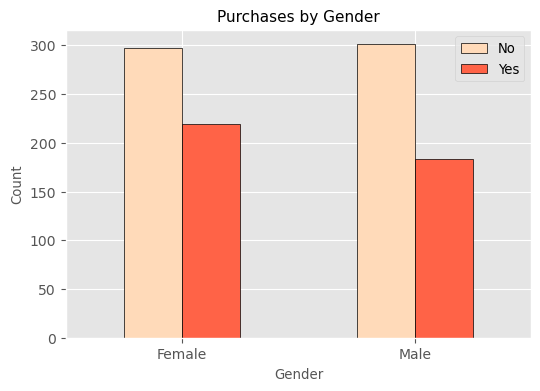

In [49]:
purc_gend = df.groupby(['gender', 'purchased'])['purchased'].count().unstack()
purc_gend.plot(kind = 'bar', edgecolor = 'black', color = ['peachpuff', 'tomato'], figsize = (6, 4))
plt.title('Purchases by Gender', fontsize = 11)
plt.xlabel('Gender', fontsize = 9.5)
plt.xticks(rotation = 0)
plt.ylabel('Count', fontsize = 9.5)
plt.legend(labels=['No', 'Yes'], fontsize = 9.5)
plt.show()

*label encode gender*

In [51]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
df['gender'] = e.fit_transform(df['gender'])

*split data into x and y*

In [157]:
x = df[['gender', 'age', 'annualsalary']]
y = df['purchased']

*feature selection*

In [76]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func = chi2, k = 2)
x_new = selector.fit_transform(x, y)

*getting corresponding variables*

In [77]:
# Get the boolean mask of selected features
selected_mask = selector.get_support()

# Get the column names of the selected features
selected_columns = x.columns[selected_mask]

print("Selected Features:")
print(selected_columns)

Selected Features:
Index(['age', 'annualsalary'], dtype='object')


*split data into train and test*

In [90]:
from sklearn.model_selection import train_test_split as t
x_train, x_test, y_train, y_test = t(x_new, y, test_size = 0.2, random_state = 1)

*scale x values*

In [91]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train)
x_test_scaled = s.fit_transform(x_test)

*function to evaluate model*

In [92]:
from sklearn.metrics import accuracy_score, f1_score

def evaluator(pred):
    print(f'accuracy score: {accuracy_score(y_test, pred)}')
    print(f'F1 score: {f1_score(y_test, pred)}')

*1st model: logistic regression*

In [93]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()

# train model
l.fit(x_train_scaled, y_train)

# create predictor
lp = l.predict(x_test_scaled)

# evaluate model
evaluator(lp)

accuracy score: 0.865
F1 score: 0.816326530612245


*2nd model: KNeighbor Classifier*

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# hyperparameters
p1 = {
    'n_neighbors':[4, 5, 10, 12],
    'weights':['uniform', 'distance', None],
    'leaf_size': [10, 20, 30, 40, 50],
    'n_jobs':[None, 2, 5]
}

# train model
k = GridSearchCV(KNeighborsClassifier(), param_grid = p1, cv = 5)
k.fit(x_train_scaled, y_train)

# create predictor
kp = k.predict(x_test_scaled)

# evaluate model
evaluator(kp)

accuracy score: 0.935
F1 score: 0.9150326797385621


In [102]:
# model's best parameters
k.best_params_

{'n_jobs': 1, 'n_neighbors': 5, 'weights': 'uniform'}

*3rd model: Random Forest Classifier*

In [113]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameters
p2 = {
    'n_estimators':[50, 100, 200, ],
    'min_samples_split':[2, 4, 6, 8, 10],
    'max_depth':[None, 5, 10, 15]
}

# train model
r = GridSearchCV(RandomForestClassifier(), param_grid = p2, cv = 3)
r.fit(x_train_scaled, y_train)

# create predictor
rp = r.predict(x_test_scaled)

# evaluate model
evaluator(rp)

accuracy score: 0.915
F1 score: 0.8888888888888887


In [109]:
# model's best parameters
r.best_params_

{'criterion': 'gini', 'min_samples_split': 8, 'n_estimators': 50}

*4th model: Extreme Gradient Boosting Classifier*

In [133]:
from xgboost import XGBClassifier

# hyperparameters
p3 = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10], 
    'min_child_weight': [3, 5, 10], 
    'learning_rate': [0.01, 0.1, 1, 2],
}

# train model
x = GridSearchCV(XGBClassifier(), param_grid = p3, cv = 5)
x.fit(x_train_scaled, y_train)

# create predictor
xp = x.predict(x_test_scaled)

# evaluate model
evaluator(xp)

accuracy score: 0.905
F1 score: 0.8789808917197452


In [135]:
# model's best parameters
x.best_params_

{'learning_rate': 0.01,
 'max_depth': None,
 'min_child_weight': 10,
 'n_estimators': 300}

*5th model: Support Vector Classifier*

In [130]:
from sklearn.svm import SVC

# hyperparameters
p4 = {
    'C': [0.1, 1, 10, 20],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'degree': [2, 3, 4, 10]
}

# train model
s = GridSearchCV(SVC(), param_grid = p4, cv = 5)
s.fit(x_train_scaled, y_train)

# create predictor
sp = s.predict(x_test_scaled)

# evaluate model
evaluator(sp)

accuracy score: 0.93
F1 score: 0.9090909090909091


In [134]:
# model's best parameters
s.best_params_

{'C': 10, 'degree': 2, 'kernel': 'rbf'}

#### feature importance

In [153]:
from sklearn.inspection import permutation_importance

result = permutation_importance(k, x_test_scaled, y_test, scoring='accuracy')
for i in result.importances_mean.argsort()[::-1]:
    print(f"Feature {i}: Importance {result.importances_mean[i]:.3f}")

Feature 0: Importance 0.287
Feature 1: Importance 0.213
